In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [0]:
#Load in data
mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255.0,x_test /255.0 
print("x_train.shape:",x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
#Build the model

model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')                         
])


In [0]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#Train the model
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.9135 - val_loss: 0.1444 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1412 - accuracy: 0.9577 - val_loss: 0.0976 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9679 - val_loss: 0.0838 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.0750 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9774 - val_loss: 0.0734 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.0690 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9803 - val_loss: 0.0717 - val_accuracy:

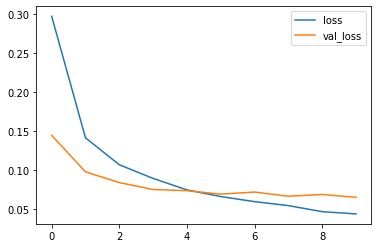

In [0]:
#plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

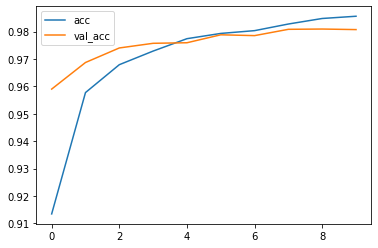

In [0]:
#plot accuracy per iteration
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [0]:
#Evaluate the model
print(model.evaluate(x_test,y_test))


313/313 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9807
[0.0649154856801033, 0.9807000160217285]


Confusion matrix, without normalization
[[ 972    0    0    0    0    1    3    1    2    1]
 [   0 1128    2    0    0    1    2    0    2    0]
 [   3    1 1009    1    3    0    2    6    7    0]
 [   1    0    4  991    0    4    0    4    4    2]
 [   1    0    2    1  964    0    3    0    0   11]
 [   2    0    0   11    2  863    4    1    8    1]
 [   6    1    1    1    5    3  938    0    3    0]
 [   2    3   11    1    2    0    0 1002    3    4]
 [   3    1    1    1    5    2    1    4  951    5]
 [   0    4    0    2    5    2    1    4    2  989]]


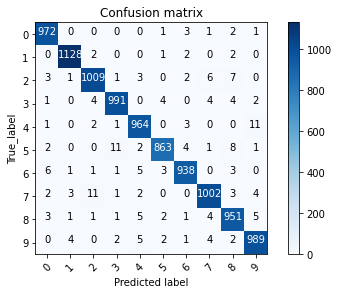

In [0]:
#plot Confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
  #this function prints and plots the confusion matrix
  if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f'if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True_label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))

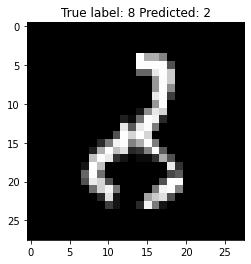

In [0]:
misclassified_idx = np.where(p_test !=y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s Predicted: %s' % (y_test[i],p_test[i]));